**Course Name : Pattern Recognition Lab**

**Course Number : CSE4214**

**Experiment Name: Implementing minimum error rate classifier.**

**Name : Enamul Haq Chowdhury**

**Section : C1**

**Student Id : 150204018**

#Headings & Imports

In [1]:
import io
import pandas as pd
import numpy as np
import random as rd
import csv
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
import math

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data_csv.csv to Data_csv.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['Data_csv.csv'] ))
print(df)

    Feature1  Feature2  Class
0     1.7044    3.6651      1
1     1.6726    4.6705      1
2     1.4597    4.1940      1
3     1.9761    4.1965      1
4     2.1897    3.1463      1
..       ...       ...    ...
95    7.8985    9.7286      2
96    7.2435   10.4561      2
97    7.4368    9.9139      2
98    7.5925    9.8320      2
99    8.1833   10.2707      2

[100 rows x 3 columns]


#Question 1

In [4]:
data = df.sample(frac=1)
print(data)

    Feature1  Feature2  Class
44    1.8667    4.3780      1
23    2.6697    4.3125      1
28    2.0405    4.2350      1
7     1.9820    3.6816      1
63    7.7494    9.3382      2
..       ...       ...    ...
32    2.9687    4.6599      1
16    2.0206    4.8171      1
47    2.9312    4.7409      1
67    8.1146    9.9617      2
31    2.8678    4.6904      1

[100 rows x 3 columns]


In [5]:
X = np.array(data['Feature1'])
Y = np.array(data['Feature2'])
C = np.array(data['Class'])

f1_train, f1_test, f2_train, f2_test, f3_train, f3_test = train_test_split(X, Y, C, test_size=0.40)

In [6]:
print(f1_train)
print(f2_train)
print(f3_train)

[1.4595 8.1146 1.9554 7.6475 7.8207 1.6219 8.4721 1.982  1.5214 7.7358
 2.2205 7.4368 1.8932 1.372  8.0277 1.7138 1.5454 2.4038 7.3955 1.8348
 1.4406 1.9761 7.5925 1.7562 1.7766 2.0206 1.9005 7.7494 7.6693 7.9464
 7.9081 7.8114 1.7044 8.2924 1.8667 2.6697 1.3862 2.541  2.0405 7.2435
 7.8985 7.9162 8.3723 8.029  1.7469 7.927  6.74   2.9687 8.6967 7.8881
 8.0842 7.9415 1.7936 1.5094 8.1245 1.6726 8.1833 7.5548 3.1863 2.1897]
[ 4.6372  9.9617  4.1154  9.6692  9.8127  4.4126 10.0221  3.6816  3.9072
 10.1634  3.9642  9.9139  4.8944  2.8472 10.4317  3.797   3.4763  3.729
  9.7069  4.1139  4.0899  4.1965  9.832   3.3273  4.1107  4.8171  4.1954
  9.3382 10.0414  9.0686  9.6332  9.8536  3.6651 10.5008  4.378   4.3125
  4.9352  3.3128  4.235  10.4561  9.7286  9.9677 10.3132 10.4983  4.2172
 10.811  10.2774  4.6599 10.3766 10.1134 10.3062  9.278   4.7678  4.4282
 10.3831  4.6705 10.2707 10.0459  3.5804  3.1463]
[1 2 1 2 2 1 2 1 1 2 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 2 2 2 2 2 1 2 1 1 1
 1 1 2 2 2 

#Question 2

In [7]:
c1F1 = np.empty((0,1),dtype=np.float64)
c1F2 = np.empty((0,1),dtype=np.float64)
c2F1 = np.empty((0,1),dtype=np.float64)
c2F2 = np.empty((0,1),dtype=np.float64)

for i in range(len(f3_train)):
  if f3_train[i] == 1:
    c1F1 = np.append(c1F1,f1_train[i])
    c1F2 = np.append(c1F2,f2_train[i])
  elif f3_train[i] == 2:
    c2F1 = np.append(c2F1,f1_train[i])
    c2F2 = np.append(c2F2,f2_train[i])

In [8]:
mc1F1 = np.mean(c1F1)
mc1F2 = np.mean(c1F2)
mc2F1 = np.mean(c2F1)
mc2F2 = np.mean(c2F2)

cvc1 = np.cov(c1F1, c1F2)
cvc2 = np.cov(c2F1, c2F2)

lc1=0
lc2=0
ltrain = len(f1_train)
for i in range(len(f3_train)):
  if f3_train[i] == 1:
    lc1=lc1+1
  elif f3_train[i] == 2:
    lc2=lc2+1

Pc1 = lc1/ltrain
Pc2 = lc2/ltrain

mc1 = np.array((1,2),dtype=np.float64)
mc1[0] = mc1F1
mc1[1] = mc1F2

mc2 = np.array((1,2),dtype=np.float64)
mc2[0] = mc2F1
mc2[1] = mc2F2

In [9]:
print(mc1)
print(mc2)
print(cvc1)
print(cvc2)
print(Pc1)
print(Pc2)

[1.92483871 4.08457419]
[ 7.86964828 10.02674483]
[[ 0.19729247 -0.02433727]
 [-0.02433727  0.28639757]]
[[0.1500418  0.02615057]
 [0.02615057 0.16178514]]
0.5166666666666667
0.48333333333333334


#Question 3

#Normal Distribution Formula

In [10]:
def NDF(X,mc,cvc):
  covD = np.linalg.det(cvc)
  covA = abs(np.linalg.det(cvc))

  P = math.pi
  p1res = 2*P
  p1res2 = pow(p1res,2)
  p1res3 = covA*p1res2
  p1res4 = pow(p1res3,0.5)
  part1 = 1/ p1res4

  sub = X - mc
  subT = sub.transpose()
  covI = 1/covD

  p2res1 = np.dot(sub,covI)
  p2res2 = np.dot(p2res1,subT)
  p2res2 = p2res2*(-0.5)

  exponent = p2res2
  part2 = math.exp(exponent)
  ndf = part1*part2
  return ndf

In [11]:
ltf1 = len(f1_test)
ltf2 = len(f2_test)
X = np.zeros((ltf1,2),dtype=np.float64)
for i in range(ltf1):
  X[i][0] = f1_test[i]
  X[i][1] = f2_test[i]

#Definition

In [12]:
tstC = np.zeros((ltf1),dtype=np.int64)
for x in range(len(X)):
  res1 = NDF(X[x],mc1,cvc1)
  prob1 = Pc1*res1

  res2 = NDF(X[x],mc2,cvc2)
  prob2 = Pc2*res2

  if prob1>prob2:
    tstC[x] = 1
  else:
    tstC[x] = 2

#Accuracy Rate

In [13]:
print(f3_test)
print(tstC)

[1 1 2 1 1 2 2 2 2 1 1 2 2 2 2 1 2 1 1 1 2 1 2 1 2 1 2 2 1 1 1 2 2 2 2 1 2
 2 1 1]
[1 1 2 1 1 2 2 2 2 1 1 2 2 2 2 1 2 1 1 1 2 1 2 1 2 1 2 2 1 1 1 2 2 2 2 1 2
 2 1 1]


In [14]:
Corr = 0
lf3_test = len(f3_test)

for i in range(lf3_test):
  if f3_test[i] == tstC[i]:
    Corr = Corr+1
accR = (Corr/lf3_test)*100
print(accR,"%")

100.0 %


#Question 4

In [15]:
Tc1F1 = np.empty((0,1),dtype=np.float64)
Tc1F2 = np.empty((0,1),dtype=np.float64)
Tc2F1 = np.empty((0,1),dtype=np.float64)
Tc2F2 = np.empty((0,1),dtype=np.float64)

for i in range(lf3_test):
  if tstC[i] == 1:
    Tc1F1 = np.append(Tc1F1,X[i][0])
    Tc1F2 = np.append(Tc1F2,X[i][1])
  elif tstC[i] == 2:
    Tc2F1 = np.append(Tc2F1,X[i][0])
    Tc2F2 = np.append(Tc2F2,X[i][1])

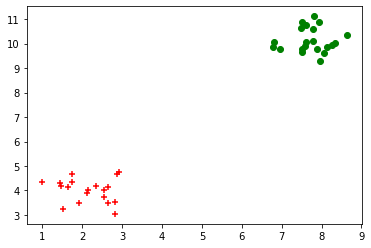

In [16]:
plt.scatter(Tc1F1, Tc1F2, c='r', marker="+")
plt.scatter(Tc2F1, Tc2F2, c='g', marker="o")
plt.show()